In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

transactional = pd.read_csv('QVI_transaction_data.csv', sep=';')

# Exploratory data analysis

In [2]:
transactional.info()
# Are columns we would expect to be numeric in numeric form and date columns are in date format?
#Date is a int, shouldn't be

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [3]:
transactional.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [4]:
from datetime import date, timedelta
start = date(1899,12,30)

new_date_format = []

for date in transactional["DATE"]:
    delta = timedelta(date)
    new_date_format.append(start + delta)

In [5]:
transactional["DATE"] = pd.to_datetime(pd.Series(new_date_format))
print(transactional["DATE"].dtype)

datetime64[ns]


In [6]:
transactional.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
#Generate a summary of the PROD_NAME column.
transactional['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [8]:
#Looks like we are definitely looking at potato chips but how can we check that these are all chips? We can do some basic text
#analysis by summarising the individual words in the product name.
transactional.PROD_NAME.str.split(expand=False)

0                    [Natural, Chip, Compny, SeaSalt175g]
1                              [CCs, Nacho, Cheese, 175g]
2            [Smiths, Crinkle, Cut, Chips, Chicken, 170g]
3             [Smiths, Chip, Thinly, S/Cream&Onion, 175g]
4          [Kettle, Tortilla, ChpsHny&Jlpno, Chili, 150g]
                               ...                       
264831    [Kettle, Sweet, Chilli, And, Sour, Cream, 175g]
264832                 [Tostitos, Splash, Of, Lime, 175g]
264833                          [Doritos, Mexicana, 170g]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno, 150g]
264835                 [Tostitos, Splash, Of, Lime, 175g]
Name: PROD_NAME, Length: 264836, dtype: object

In [9]:
#There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.

transactional = transactional[~transactional["PROD_NAME"].str.contains(r"[Ss]alsa")]
transactional.reset_index(inplace=True)

In [10]:
#transactional.PROD_NAME.str.split(expand=True)

In [11]:
# Create a variable called "PACK_SIZE"
transactional['PACK_SIZE'] = transactional.PROD_NAME.str.extract("(\d+)")
transactional['PACK_SIZE'] = pd.to_numeric(transactional.PACK_SIZE)
transactional['PACK_SIZE']

0         175
1         175
2         170
3         175
4         150
         ... 
246737    175
246738    175
246739    170
246740    150
246741    175
Name: PACK_SIZE, Length: 246742, dtype: int64

In [12]:
# Create a variable called "BRAND_NAME" we can use the first word in PROD_NAME to work out the brand name
transactional['BRAND_NAME'] = transactional['PROD_NAME'].str.split(' ').str[0]
transactional['BRAND_NAME']

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
246737      Kettle
246738    Tostitos
246739     Doritos
246740     Doritos
246741    Tostitos
Name: BRAND_NAME, Length: 246742, dtype: object

In [13]:
#As we are only interested in words that will tell us if the product is chips or not, let's remove all words with digits 
#and special characters such as '&' from our set of product words

transactional.PROD_NAME = transactional.PROD_NAME.str.strip()     
transactional.PROD_NAME = transactional.PROD_NAME.str.replace(' ', '_')
transactional.PROD_NAME = transactional.PROD_NAME.str.replace(r"[^a-zA-Z\d\_]+", "")    
transactional.PROD_NAME = transactional.PROD_NAME.str.replace(r"[^a-zA-Z\d\_]+", "")
transactional.PROD_NAME = transactional.PROD_NAME.str.replace("\d+", "")
transactional.PROD_NAME = transactional.PROD_NAME.str.replace("g", "")

In [14]:
#Column after text transformation
transactional.PROD_NAME.str.split(expand=False)

0          [Natural_Chip________Compny_SeaSalt]
1                        [CCs_Nacho_Cheese____]
2          [Smiths_Crinkle_Cut__Chips_Chicken_]
3            [Smiths_Chip_Thinly__SCreamOnion_]
4         [Kettle_Tortilla_ChpsHnyJlpno_Chili_]
                          ...                  
246737    [Kettle_Sweet_Chilli_And_Sour_Cream_]
246738              [Tostitos_Splash_Of__Lime_]
246739                   [Doritos_Mexicana____]
246740    [Doritos_Corn_Chip_Mexican_Jalapeno_]
246741              [Tostitos_Splash_Of__Lime_]
Name: PROD_NAME, Length: 246742, dtype: object

In [15]:
#Let's look at the most common words by counting the number of times a word appears and sorting them by this frequency 
#in order of highest to lowest frequency
from collections import Counter
most_common = Counter(" ".join(transactional.PROD_NAME).split()).most_common(5)
most_common

[('Kettle_Mozzarella___Basil__Pesto_', 3304),
 ('Kettle_Tortilla_ChpsHnyJlpno_Chili_', 3296),
 ('Cobs_Popd_SwtChlli_SrCream_Chips_', 3269),
 ('Tyrrells_Crisps_____Ched__Chives_', 3268),
 ('Cobs_Popd_Sea_Salt__Chips_', 3265)]

In [16]:
#After dropping rows containg "salsa" word, we have decreased the # of rows from 264836 to 246742
transactional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246742 entries, 0 to 246741
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           246742 non-null  int64         
 1   DATE            246742 non-null  datetime64[ns]
 2   STORE_NBR       246742 non-null  int64         
 3   LYLTY_CARD_NBR  246742 non-null  int64         
 4   TXN_ID          246742 non-null  int64         
 5   PROD_NBR        246742 non-null  int64         
 6   PROD_NAME       246742 non-null  object        
 7   PROD_QTY        246742 non-null  int64         
 8   TOT_SALES       246742 non-null  float64       
 9   PACK_SIZE       246742 non-null  int64         
 10  BRAND_NAME      246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 20.7+ MB


In [17]:
# Summarise the data to check for nulls and possible outliers
print(transactional.STORE_NBR.describe())
print(transactional.LYLTY_CARD_NBR.describe())
print(transactional.TXN_ID.describe())
print(transactional.PROD_NBR.describe())
print(transactional.PROD_QTY.describe()) #We catch an outlier, as the max value 200 refers to a transaction where 200 units
                                        #were bought.
                                        
print(transactional.TOT_SALES.describe())

count    246742.000000
mean        135.051098
std          76.787096
min           1.000000
25%          70.000000
50%         130.000000
75%         203.000000
max         272.000000
Name: STORE_NBR, dtype: float64
count    2.467420e+05
mean     1.355310e+05
std      8.071528e+04
min      1.000000e+03
25%      7.001500e+04
50%      1.303670e+05
75%      2.030840e+05
max      2.373711e+06
Name: LYLTY_CARD_NBR, dtype: float64
count    2.467420e+05
mean     1.351311e+05
std      7.814772e+04
min      1.000000e+00
25%      6.756925e+04
50%      1.351830e+05
75%      2.026538e+05
max      2.415841e+06
Name: TXN_ID, dtype: float64
count    246742.000000
mean         56.351789
std          33.695428
min           1.000000
25%          26.000000
50%          53.000000
75%          87.000000
max         114.000000
Name: PROD_NBR, dtype: float64
count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%          

In [18]:
#### Let's see if the customer has had other transactions
# Use a filter to see what other transactions that customer made.
transactional[(transactional['LYLTY_CARD_NBR'] == 226000)]
#RESULT: It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. 
#The customer might be buying chips for commercial purposes instead. 

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
64955,69762,2018-08-19,226,226000,226201,4,Dorito_Corn_Chp_____Supreme_,200,650.0,380,Dorito
64956,69763,2019-05-20,226,226000,226210,4,Dorito_Corn_Chp_____Supreme_,200,650.0,380,Dorito


In [19]:
##We'll remove this loyalty card number from further analysis
transactional = transactional[transactional.LYLTY_CARD_NBR != 226000]
transactional.reset_index(inplace=True)

In [20]:
## Max transaction now is 5, seems normal
transactional.PROD_QTY.describe()

count    246740.000000
mean          1.906456
std           0.342499
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: PROD_QTY, dtype: float64

In [21]:
#Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.
#### Count the number of transactions by date
# Create a summary of transaction count by date.
transactional.DATE.nunique()

364

In [22]:
#There's only 364 rows, meaning only 364 dates which indicates a missing date. 
pd.date_range(start= '2018-07-01', end= '2019-06-30').difference(transactional.DATE)
##RESULT: CHRISTMAS IS MISSING, MOST OF THE STORES ARE CLOSED

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

*Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date*

In [23]:
#### Create a sequence of dates and join this the count of transactions by date
a = pd.pivot_table(transactional, values= 'TOT_SALES', index='DATE', aggfunc='sum')
a

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0
...,...
2019-06-26,4829.7
2019-06-27,4941.3
2019-06-28,4876.6


In [24]:
### Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019
b = pd.DataFrame(index=pd.date_range(start= '2018-07-01', end= '2019-06-30'))
b['TOT_SALES']=0
b

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0
...,...
2019-06-26,0
2019-06-27,0
2019-06-28,0
2019-06-29,0


In [25]:
#Join the sequence of dates from 1 Jul 2018 to 30 Jun 2019 onto the data to fill in the missing day.
c = a + b
c.fillna(0, inplace = True)
c.index.name = 'DATE'
c

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0
...,...
2019-06-26,4829.7
2019-06-27,4941.3
2019-06-28,4876.6


<IPython.core.display.Javascript object>


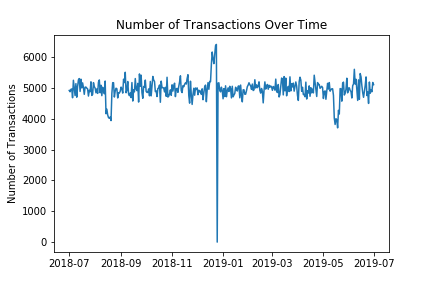

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.plot(c,'-',)

In [27]:
x = plt.gca() #Get the current axis
x.set_title('Number of Transactions Over Time')
x.set_ylabel('Number of Transactions')
#We can see that there is an increase in purchases in December and a break in late December.

Text(0, 0.5, 'Number of Transactions')

In [28]:
#### Filter to December and look at individual days
december = c.loc['2018-12-01':'2018-12-31']
december.head()

,TOT_SALES
DATE,
2018-12-01,5000.9
2018-12-02,4781.1
2018-12-03,4927.0
2018-12-04,4869.4
2018-12-05,4900.5


<IPython.core.display.Javascript object>


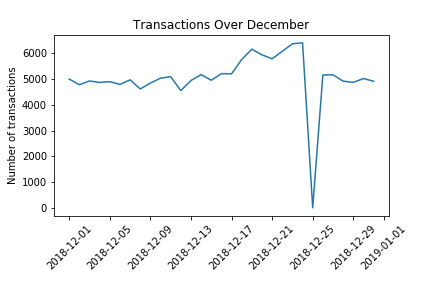

In [29]:
plt.figure()
plt.plot(december,'-',)
#We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself.
#This is due to shops being closed on Christmas day.

In [30]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [31]:
x = plt.gca()
x.set_ylabel('Number of transactions')
x.set_title('Transactions Over December')

Text(0.5, 1.0, 'Transactions Over December')

In [32]:
#Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand 
#of chips or pack size from PROD_NAME

In [33]:
#### Pack size was created, let's analize it
transactional.PACK_SIZE.describe()
#The largest size is 380g and the smallest size is 70g

count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

In [34]:
##Plot a histogram showing the number of transactions by pack size.

In [35]:
newdf = pd.pivot_table(transactional, values= 'TOT_SALES', index='PACK_SIZE', aggfunc='sum')
newdf.head()

,TOT_SALES
PACK_SIZE,
70,6852.0
90,9676.4
110,162765.4
125,5733.0
134,177655.5


In [36]:
df1 = newdf.reset_index()

<IPython.core.display.Javascript object>


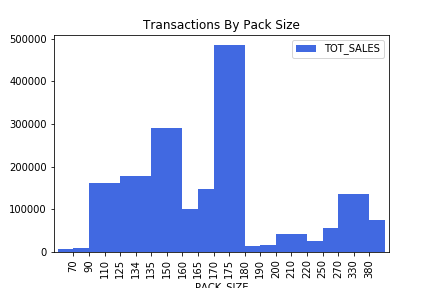

In [37]:
a = df1.plot(x= "PACK_SIZE", y= "TOT_SALES", kind="bar", width=2, color='royalblue', alpha=1, title = 'Transactions By Pack Size')

In [38]:
#### Brand Name was created, let's analize it and check if the results are reasonable
transactional.BRAND_NAME.unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [39]:
#Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips
#Let's combine these together
transactional.BRAND_NAME.replace('Red', 'RRD', inplace=True)
transactional.BRAND_NAME.replace('Dorito', 'Doritos', inplace=True)
transactional.BRAND_NAME.replace('Smith', 'Smiths', inplace=True)
transactional.BRAND_NAME.replace('Snbts', 'Sunbites', inplace=True)
transactional.BRAND_NAME.replace('NCC', 'Natural', inplace=True)
transactional.BRAND_NAME.replace('Grain', 'GrnWves', inplace=True)
transactional.BRAND_NAME.replace('WW', 'Woolworths', inplace=True)
transactional.BRAND_NAME.replace('Infzns', 'Infuzions', inplace=True)


transactional.BRAND_NAME.unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'GrnWves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

# Examining customer data

In [40]:
customer = pd.read_csv('QVI_purchase_behaviour.csv')
#Do some basic summaries of the dataset, including distributions of any key columns.
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [41]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [42]:
customer.PREMIUM_CUSTOMER.describe()

count          72637
unique             3
top       Mainstream
freq           29245
Name: PREMIUM_CUSTOMER, dtype: object

<IPython.core.display.Javascript object>


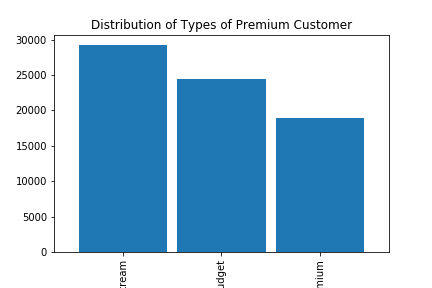

In [43]:
plt.figure()
customer.PREMIUM_CUSTOMER.value_counts().plot(kind='bar', width=0.9, title='Distribution of Types of Premium Customer')

In [44]:
#we can be sure that no duplicates were created. This is because we created `data` by setting a left join which means 
#take all the rows in `transactionData` and find rows with matching values in shared columns and then joining the details 
#in the first mentioned table
data = transactional.merge(customer, how='left')

In [45]:
# Let's also check if some customers were not matched on by checking for nulls (LYLTY_CARD_NBR)
# See if any transactions did not have a matched customer.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   level_0           246740 non-null  int64         
 1   index             246740 non-null  int64         
 2   DATE              246740 non-null  datetime64[ns]
 3   STORE_NBR         246740 non-null  int64         
 4   LYLTY_CARD_NBR    246740 non-null  int64         
 5   TXN_ID            246740 non-null  int64         
 6   PROD_NBR          246740 non-null  int64         
 7   PROD_NAME         246740 non-null  object        
 8   PROD_QTY          246740 non-null  int64         
 9   TOT_SALES         246740 non-null  float64       
 10  PACK_SIZE         246740 non-null  int64         
 11  BRAND_NAME        246740 non-null  object        
 12  LIFESTAGE         246740 non-null  object        
 13  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: d

# Data analysis on customer segments 
*We can define some **metrics of interest** to the client:*
1. Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
2. How many customers are in each segment
3. How many chips are bought per customer by segment
4. What's the average chip price by customer segment

*We could also ask our data team for more information:*
- The customer's *total spend over the period* and *total spend for each transaction* to **understand what proportion of their grocery spend is on chips.**

- *Proportion of customers in each customer segment overall* to **compare against** the *mix of customers who purchase chips*

# Who spends the most on chips **(total sales)**, describing customers by:

In [46]:
#Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER, that is calculate the summary of sales
#by those dimensions
grouped_sales = pd.DataFrame(data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum']))
grouped_sales.sort_values(ascending=False, by='sum')
grouped_sales.rename(columns = {'sum':'TOT_SALES'})
## Total sales by LIFESTAGE and PREMIUM_CUSTOMER

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

<IPython.core.display.Javascript object>


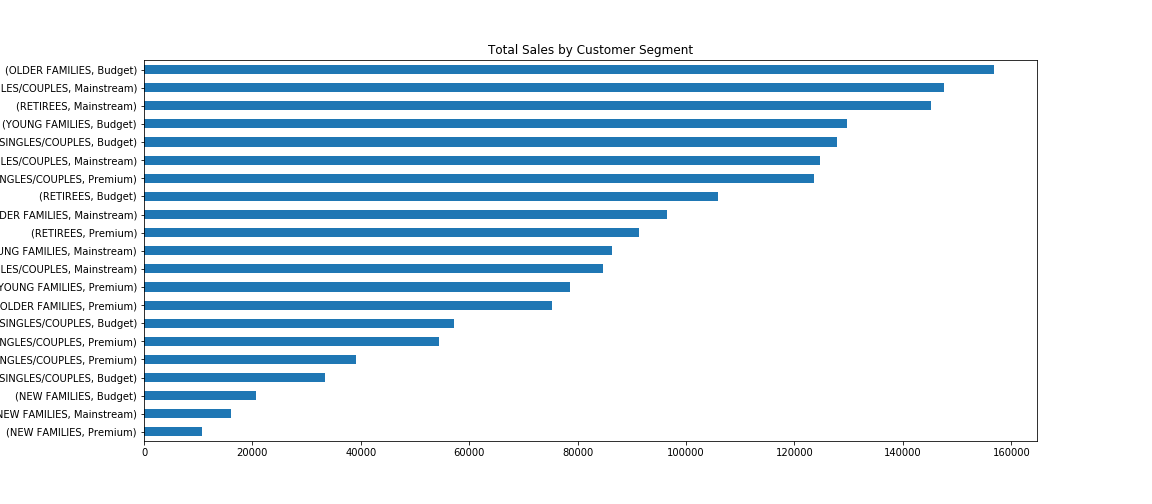

In [47]:
plt.figure()
plot0 = grouped_sales["sum"].sort_values().plot.barh(figsize=(16,7), title = 'Total Sales by Customer Segment')

<IPython.core.display.Javascript object>


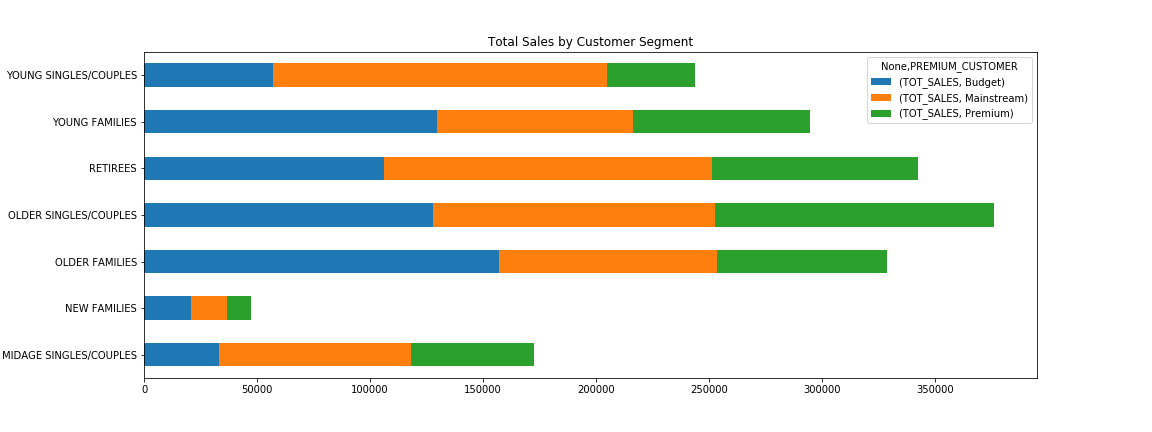

In [48]:
import matplotlib.pyplot as plt
plot = pd.DataFrame(data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
plot.unstack().plot(kind = 'barh', stacked = True, figsize = (16,6), title = 'Total Sales by Customer Segment')
#Sales are coming mainly from: 
# 1. Budget - older families
# 2. Mainstream - young singles/couples
# 3. Mainstream - retirees

# Let's see if the higher sales are due to there being more customers who buy chips

### 2. How many customers are in each segment

In [49]:
#### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
#Calculate the summary of number of customers by those dimensions and create a plot:
nunique_customers = data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).LYLTY_CARD_NBR.nunique().sort_values(ascending=False)
nunique_customers = pd.DataFrame(nunique_customers)
nunique_customers.rename(columns = {'LYLTY_CARD_NBR' : 'Number_Customers'}, inplace= True)
nunique_customers

Number_Customers
LIFESTAGE              PREMIUM_CUSTOMER                  
YOUNG SINGLES/COUPLES  Mainstream                    7917
RETIREES               Mainstream                    6358
OLDER SINGLES/COUPLES  Mainstream                    4858
                       Budget                        4849
                       Premium                       4682
OLDER FAMILIES         Budget                        4611
RETIREES               Budget                        4385
YOUNG FAMILIES         Budget                        3953
RETIREES               Premium                       3812
YOUNG SINGLES/COUPLES  Budget                        3647
MIDAGE SINGLES/COUPLES Mainstream                    3298
OLDER FAMILIES         Mainstream                    2788
YOUNG FAMILIES         Mainstream                    2685
YOUNG SINGLES/COUPLES  Premium                       2480
YOUNG FAMILIES         Premium                       2398
MIDAGE SINGLES/COUPLES Premium                       2369
OLDER FAMILIES         Premium                       2231
MIDAGE SINGLES/COUPLES Budget                        1474
NEW FAMILIES           Budget                        1087
                       Mainstream                     830
                       Premium                        575

<IPython.core.display.Javascript object>


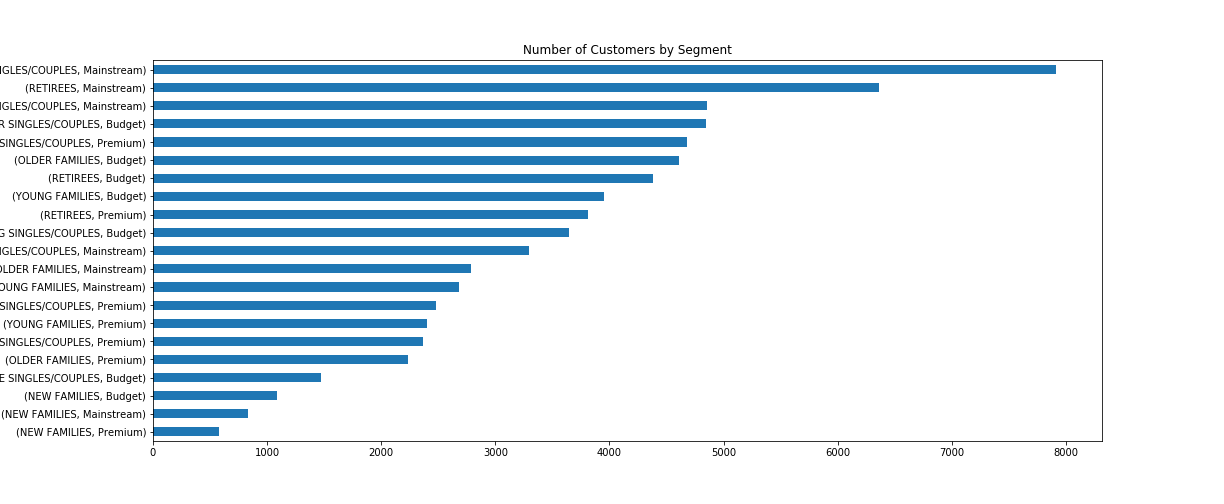

In [50]:
plt.figure()
nunique_customers = data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(nunique_customers)
nunique_customers.sort_values().plot.barh(figsize=(17,7), title = 'Number of Customers by Segment')

<IPython.core.display.Javascript object>


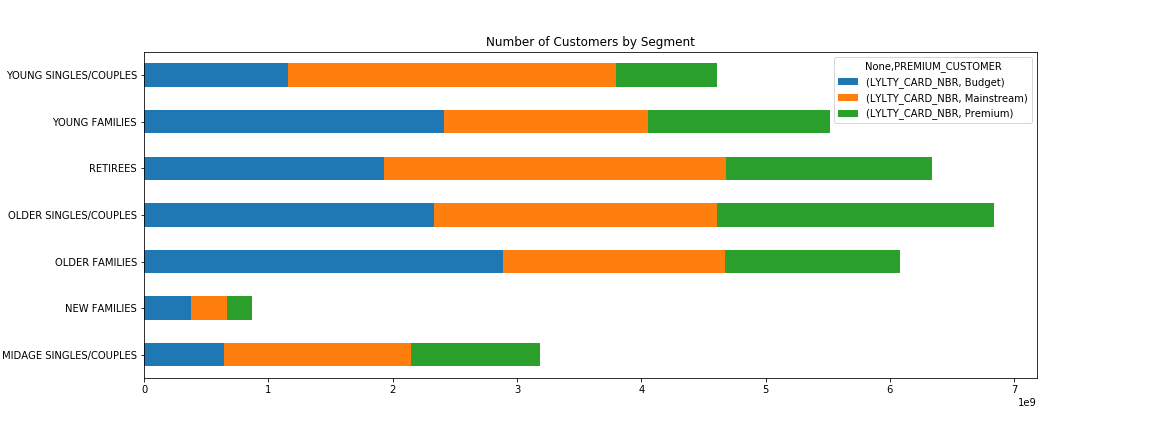

In [51]:
import matplotlib.pyplot as plt
plot = pd.DataFrame(data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.sum())
plot.unstack().plot(kind = 'barh', stacked = True, figsize = (16,6), title = 'Number of Customers by Segment')
# Customers who buy the larger amounts of chips:
# 1. Mainstream - young singles/couples
# 2. Mainstream - retirees
# (This contributes to there being more sales to these customer segments)

# BUT this is not a major driver for the BUDGET - OLDER FAMILIES SEGMENT

# How many chips are bought per customer by segment

In [52]:
# Higher sales may also be driven by more units of chips being bought per customer

#total quantity of products that were bought
PROD_QUANTIY = data.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"])['PROD_QTY'].sum()

#### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
unique_customers = data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].nunique()

#### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = PROD_QUANTIY/unique_customers
avg_units = pd.DataFrame(avg_units, columns= {'Avg_unit_customer'})
avg_units.sort_values(by='Avg_unit_customer', ascending = False)

,,Avg_unit_customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013
Mainstream,YOUNG FAMILIES,8.638361
Budget,OLDER SINGLES/COUPLES,6.781398
Premium,OLDER SINGLES/COUPLES,6.769543
Mainstream,OLDER SINGLES/COUPLES,6.712021


<IPython.core.display.Javascript object>


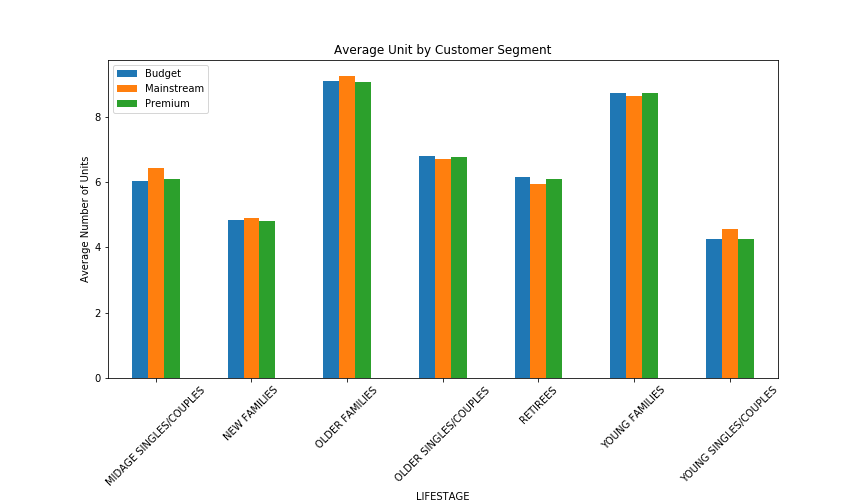

In [53]:
avgUnitsPlot = pd.DataFrame(data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avgUnitsPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

#Older families and young families in general buy more chips per customer

# What's the average chip price by customer segment

In [54]:
# Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver 
#of total sales.

#total quantity of products that were bought
PROD_QUANTIY = data.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"])['PROD_QTY'].sum()

#### Total Sales by LIFESTAGE and PREMIUM_CUSTOMER
Total_sales = data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum()

#### Average price per unit 
avg_units_chips = PROD_QUANTIY/Total_sales
avg_units_chips

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    0.266391
                  NEW FAMILIES              0.254325
                  OLDER FAMILIES            0.266811
                  OLDER SINGLES/COUPLES     0.257233
                  RETIREES                  0.254276
                  YOUNG FAMILIES            0.265823
                  YOUNG SINGLES/COUPLES     0.271349
Mainstream        MIDAGE SINGLES/COUPLES    0.250347
                  NEW FAMILIES              0.254072
                  OLDER FAMILIES            0.267639
                  OLDER SINGLES/COUPLES     0.261592
                  RETIREES                  0.259539
                  YOUNG FAMILIES            0.268641
                  YOUNG SINGLES/COUPLES     0.245456
Premium           MIDAGE SINGLES/COUPLES    0.264493
                  NEW FAMILIES              0.257323
                  OLDER FAMILIES            0.268983
                  OLDER SINGLES/COUPLES     0.256562
     

<IPython.core.display.Javascript object>


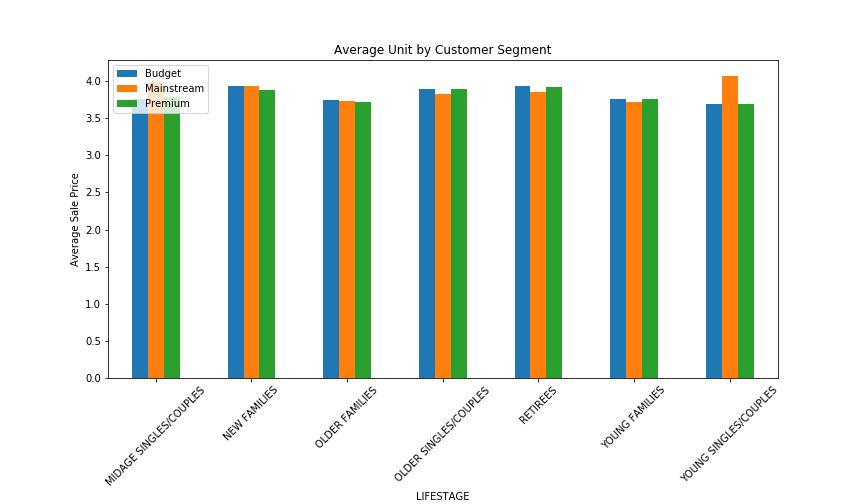

In [55]:
avgUnitsPricePlot = pd.DataFrame(data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgUnitsPricePlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Sale Price')                              
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

#Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget 
#and premium counterparts. 

#This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly 
#for entertainment purposes rather than their own consumption.

#This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their 
#mainstream counterparts.

# As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [56]:
data['price_unit'] = data['TOT_SALES']/data['PROD_QTY']

In [57]:
from scipy.stats import ttest_ind

# Group our data into mainstream and non-mainstream 
mainstream = data['PREMIUM_CUSTOMER'] == "Mainstream"
nonmainstream = (data['PREMIUM_CUSTOMER'] == "Budget") | (data['PREMIUM_CUSTOMER'] == "Premium")

# Filter only midage & young single/couples
midage_young = (data['LIFESTAGE'] == "MIDAGE SINGLES/COUPLES") | (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')

#T-test:
a = data[midage_young & mainstream]["TOT_SALES"]
b = data[midage_young & nonmainstream]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.834645908180742e-237


True

## We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips

In [58]:
#### Deep dive into Mainstream, young singles/couples 
#### Work out of there are brands that these two customer segments prefer more than others
# You could use a technique called affinity analysis or a-priori analysis


## Affinity to Brand

In [59]:
newdf0 = data[(data['PREMIUM_CUSTOMER'] == "Mainstream") & (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
targetBrand = newdf0.loc[:, ['BRAND_NAME', 'PROD_QTY']]
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY']/targetBrand['PROD_QTY'].sum()
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND_NAME')['Target Brand Affinity'].sum())
targetBrand.sort_values(by='Target Brand Affinity', ascending = False).head()

,Target Brand Affinity
BRAND_NAME,
Kettle,0.197985
Doritos,0.122761
Pringles,0.119420
Smiths,0.096370
Infuzions,0.064679


In [60]:
newdf1 = data[(data['PREMIUM_CUSTOMER'] != 'Mainstream') & (data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES')]
nonTargetBrand = newdf1.loc[:, ['BRAND_NAME', 'PROD_QTY']]
nonTargetBrand['Nontarget Brand Affinity'] = nonTargetBrand['PROD_QTY']/nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND_NAME')['Nontarget Brand Affinity'].sum())
nonTargetBrand.sort_values(by='Nontarget Brand Affinity', ascending=False).head()

,Nontarget Brand Affinity
BRAND_NAME,
Kettle,0.166560
Smiths,0.124218
Doritos,0.101171
Pringles,0.101110
RRD,0.067184


In [66]:
merged_ = pd.merge(targetBrand, nonTargetBrand, left_index=True, right_index=True)
merged_['Affinity To Brand'] = merged_['Target Brand Affinity']/merged_['Nontarget Brand Affinity']
merged_.sort_values(by = 'Affinity To Brand', ascending=False)
#Mainstream young singles/couples are more likely to purchase Tyrrells chips compared to other brands.

,Target Brand Affinity,Nontarget Brand Affinity,Affinity To Brand
BRAND_NAME,,,
Tyrrells,0.031553,0.025715,1.227025
Twisties,0.046184,0.037933,1.217506
Doritos,0.122761,0.101171,1.213397
Kettle,0.197985,0.166560,1.188667
Tostitos,0.045411,0.038350,1.184100
Pringles,0.119420,0.101110,1.181090
Cobs,0.044638,0.038449,1.160959
Infuzions,0.064679,0.057410,1.126622
Thins,0.060373,0.057159,1.056217


## Pack Size Insights

In [62]:
targetSize = newdf0.loc[:, ['PACK_SIZE', 'PROD_QTY']]
targetSize['Target Size Affinity'] = targetSize['PROD_QTY']/targetSize['PROD_QTY'].sum()
targetSize = pd.DataFrame(targetSize.groupby('PACK_SIZE')['Target Size Affinity'].sum())
targetSize.sort_values(by='Target Size Affinity', ascending = False).head()

,Target Size Affinity
PACK_SIZE,
175,0.254990
150,0.157598
134,0.119420
110,0.106280
170,0.080773


In [63]:
nontargetSize = newdf1.loc[:, ['PACK_SIZE', 'PROD_QTY']]
nontargetSize['Nontarget Size Affinity'] = nontargetSize['PROD_QTY']/nontargetSize['PROD_QTY'].sum()
nontargetSize = pd.DataFrame(nontargetSize.groupby('PACK_SIZE')['Nontarget Size Affinity'].sum())
nontargetSize.sort_values(by='Nontarget Size Affinity', ascending = False).head()

,Nontarget Size Affinity
PACK_SIZE,
175,0.271458
150,0.163070
134,0.101110
110,0.089575
170,0.080347


In [67]:
merged = pd.merge(targetSize, nontargetSize, left_index=True, right_index=True)
merged['Affinity To Pack Size'] = merged['Target Size Affinity']/merged['Nontarget Size Affinity']
merged.sort_values(by = 'Affinity To Pack Size', ascending=False).head()

,Target Size Affinity,Nontarget Size Affinity,Affinity To Pack Size
PACK_SIZE,,,
270,0.031829,0.025070,1.269608
380,0.032160,0.025711,1.250827
330,0.061284,0.050974,1.202243
110,0.106280,0.089575,1.186492
134,0.119420,0.101110,1.181090


# Conclusions
1. Budget - older families (156863.75),  Mainstream - young singles/couples (147582.20) and Mainstream - retirees (145168.95) spends the most on chips

2. There's a high number of customers who belong to the segment Mainstream - young singles/couples (7917 persons), the second place is composed for Mainstream - Retirees. This could explain the total impact in sales.
3. Mainstream - Older Families buy on average 9.25 chips units, they are also the segment who buy more on average. 
4. Mainstream midage and young singles/couples are more willing to pay more per packet of chips compared to their budget  and premium counterparts (more than 4 dollars).
